<a href="https://colab.research.google.com/github/rishi15-t/PP-MM/blob/master/BaseModelGMU_(2_units).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
#dataset = pd.read_pickle('/content/drive/My Drive/dataset/dataset_gmu_paper.pkl')

In [0]:
 from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.nn import BCEWithLogitsLoss
from torch.nn.functional import softplus
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.nn.utils import clip_grad_norm_
from torch.optim import AdamW
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm, trange
from sklearn import metrics
#!pip install transformers
#from transformers import get_linear_schedule_with_warmup
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import time
import datetime
!pip install git+https://github.com/uber/pyro.git
import pyro
from pyro import poutine
from pyro.distributions import Normal, Categorical, Laplace
from pyro.infer import SVI, Trace_ELBO, TraceEnum_ELBO
from pyro.optim import ClippedAdam


'''def Train_Test_Val_Split(data , test_data_fraction = 0.3, val_data_fraction = 0.1) :
    
    mlb = MultiLabelBinarizer()
    data_genres_one_hot_encoding = mlb.fit_transform(data['genres'])
    Label_names = mlb.classes_
    data_genres_one_hot_encoding = pd.DataFrame(data_genres_one_hot_encoding, columns = mlb.classes_)
    Data_train, Data_test, Labels_train, Labels_test = train_test_split(data, data_genres_one_hot_encoding, test_size = test_data_fraction)
    Labels_train = torch.tensor(Labels_train.values)
    Labels_test = torch.tensor(Labels_test.values)
    
    Data_train, Data_val, Labels_train, Labels_val = train_test_split(Data_train, Labels_train, test_size = val_data_fraction)

    Data_train = Data_train.reset_index(drop=True)
    Data_test = Data_test.reset_index(drop=True)
    Data_val = Data_val.reset_index(drop=True)
    

    return (Data_train, Data_test, Data_val, Labels_train, Labels_test, Labels_val, Label_names)
    
Data_train, Data_test, Data_val, Labels_train_tensor, Labels_test_tensor, Labels_val_tensor, Label_names = Train_Test_Val_Split(dataset)


Data_train_tensor_text = torch.tensor(Data_train['w2v_embeddings'])
Data_test_tensor_text = torch.tensor(Data_test['w2v_embeddings'])
Data_val_tensor_text = torch.tensor(Data_val['w2v_embeddings'])

Data_train_tensor_image = torch.tensor(Data_train['vgg16_embeddings'])
Data_test_tensor_image = torch.tensor(Data_test['vgg16_embeddings'])
Data_val_tensor_image = torch.tensor(Data_val['vgg16_embeddings'])'''

  Cloning https://github.com/uber/pyro.git to /tmp/pip-req-build-zsa66mg6
  Running command git clone -q https://github.com/uber/pyro.git /tmp/pip-req-build-zsa66mg6
     |████████████████████████████████| 61kB 10.1MB/s 
  Created wheel for pyro-ppl: filename=pyro_ppl-1.2.1+cb1a6156-cp36-none-any.whl size=494221 sha256=aa38704e9cbae45e798ddb1818492c7088d63d8850d91cbb000fa9ef94d1e3fe
  Stored in directory: /tmp/pip-ephem-wheel-cache-m1s877b8/wheels/3c/10/ed/73d2332a097e2e9dc7d601ca2a99b0b4f9634e393474b78137
Successfully built pyro-ppl
ERROR: tensor2tensor 1.14.1 requires bz2file, which is not installed.
ERROR: tensor2tensor 1.14.1 requires gevent, which is not installed.
ERROR: tensor2tensor 1.14.1 requires gunicorn, which is not installed.
ERROR: tensor2tensor 1.14.1 requires kfac, which is not installed.
ERROR: tensor2tensor 1.14.1 requires mesh-tensorflow, which is not installed.
ERROR: tensor2tensor 1.14.1 requires pypng, which is not installed.
ERROR: tensor2tensor 1.14.1 requires 

"def Train_Test_Val_Split(data , test_data_fraction = 0.3, val_data_fraction = 0.1) :\n   \n   mlb = MultiLabelBinarizer()\n   data_genres_one_hot_encoding = mlb.fit_transform(data['genres'])\n   Label_names = mlb.classes_\n   data_genres_one_hot_encoding = pd.DataFrame(data_genres_one_hot_encoding, columns = mlb.classes_)\n   Data_train, Data_test, Labels_train, Labels_test = train_test_split(data, data_genres_one_hot_encoding, test_size = test_data_fraction)\n   Labels_train = torch.tensor(Labels_train.values)\n   Labels_test = torch.tensor(Labels_test.values)\n   \n   Data_train, Data_val, Labels_train, Labels_val = train_test_split(Data_train, Labels_train, test_size = val_data_fraction)\n\n   Data_train = Data_train.reset_index(drop=True)\n   Data_test = Data_test.reset_index(drop=True)\n   Data_val = Data_val.reset_index(drop=True)\n   \n\n   return (Data_train, Data_test, Data_val, Labels_train, Labels_test, Labels_val, Label_names)\n   \nData_train, Data_test, Data_val, Labels_

In [0]:
'''torch.save(Data_train_tensor_text, "/content/drive/My Drive/dataset/Data_train_tensor_text.pt")
torch.save(Data_test_tensor_text, "/content/drive/My Drive/dataset/Data_test_tensor_text.pt")
torch.save(Data_val_tensor_text, "/content/drive/My Drive/dataset/Data_val_tensor_text.pt")
torch.save(Data_train_tensor_image, "/content/drive/My Drive/dataset/Data_train_tensor_image.pt")
torch.save(Data_test_tensor_image, "/content/drive/My Drive/dataset/Data_test_tensor_image.pt")
torch.save(Data_val_tensor_image, "/content/drive/My Drive/dataset/Data_val_tensor_image.pt")
torch.save(Labels_train_tensor, "/content/drive/My Drive/dataset/Labels_train_tensor.pt")
torch.save(Labels_test_tensor, "/content/drive/My Drive/dataset/Labels_test_tensor.pt")
torch.save(Labels_val_tensor, "/content/drive/My Drive/dataset/Labels_val_tensor.pt")'''

'torch.save(Data_train_tensor_text, "/content/drive/My Drive/dataset/Data_train_tensor_text.pt")\ntorch.save(Data_test_tensor_text, "/content/drive/My Drive/dataset/Data_test_tensor_text.pt")\ntorch.save(Data_val_tensor_text, "/content/drive/My Drive/dataset/Data_val_tensor_text.pt")\ntorch.save(Data_train_tensor_image, "/content/drive/My Drive/dataset/Data_train_tensor_image.pt")\ntorch.save(Data_test_tensor_image, "/content/drive/My Drive/dataset/Data_test_tensor_image.pt")\ntorch.save(Data_val_tensor_image, "/content/drive/My Drive/dataset/Data_val_tensor_image.pt")\ntorch.save(Labels_train_tensor, "/content/drive/My Drive/dataset/Labels_train_tensor.pt")\ntorch.save(Labels_test_tensor, "/content/drive/My Drive/dataset/Labels_test_tensor.pt")\ntorch.save(Labels_val_tensor, "/content/drive/My Drive/dataset/Labels_val_tensor.pt")'

In [0]:
Data_train_tensor_text = torch.load("/content/drive/My Drive/dataset/Data_train_tensor_text.pt")
Data_test_tensor_text = torch.load( "/content/drive/My Drive/dataset/Data_test_tensor_text.pt")
Data_val_tensor_text = torch.load( "/content/drive/My Drive/dataset/Data_val_tensor_text.pt")
Data_train_tensor_image = torch.load( "/content/drive/My Drive/dataset/Data_train_tensor_image.pt")
Data_test_tensor_image = torch.load( "/content/drive/My Drive/dataset/Data_test_tensor_image.pt")
Data_val_tensor_image = torch.load( "/content/drive/My Drive/dataset/Data_val_tensor_image.pt")
Labels_train_tensor = torch.load("/content/drive/My Drive/dataset/Labels_train_tensor.pt")
Labels_test_tensor = torch.load("/content/drive/My Drive/dataset/Labels_test_tensor.pt")
Labels_val_tensor = torch.load("/content/drive/My Drive/dataset/Labels_val_tensor.pt")

Label_names = np.array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype=object)

In [0]:
#Neural networks


#source: https://github.com/Duncanswilson/maxout-pytorch/blob/master/maxout_pytorch.ipynb
class ListModule(object):
    def __init__(self, module, prefix, *args):
        self.module = module
        self.prefix = prefix
        self.num_module = 0
        for new_module in args:
            self.append(new_module)

    def append(self, new_module):
        if not isinstance(new_module, nn.Module):
            raise ValueError('Not a Module')
        else:
            self.module.add_module(self.prefix + str(self.num_module), new_module)
            self.num_module += 1

    def __len__(self):
        return self.num_module

    def __getitem__(self, i):
        if i < 0 or i >= self.num_module:
            raise IndexError('Out of bound')
        return getattr(self.module, self.prefix + str(i))


class Maxout_MLP(nn.Module):
    
    def __init__(self, hidden_layer_size1, hidden_layer_size2, dropout, num_labels = 23, num_maxout_units=2):
        
        super(Maxout_MLP, self).__init__()
        self.fc1_list = ListModule(self, "fc1_")
        self.fc2_list = ListModule(self, "fc2_")
        self.hidden_layer_size1 = hidden_layer_size1
        self.hidden_layer_size2 = hidden_layer_size2
        for _ in range(num_maxout_units):
            self.fc1_list.append(nn.Linear(self.hidden_layer_size1, self.hidden_layer_size2))
            self.fc2_list.append(nn.Linear(self.hidden_layer_size2, self.hidden_layer_size2))
        self.dropout = nn.Dropout(p=dropout)
        self.sigmoid = torch.nn.Sigmoid()
        self.linear = torch.nn.Linear(self.hidden_layer_size2, num_labels)  #PP_MM_pattern 4

        self.bn0 = nn.BatchNorm1d(self.hidden_layer_size1)
        self.bn1 = nn.BatchNorm1d(self.hidden_layer_size2)
        self.bn2 = nn.BatchNorm1d(self.hidden_layer_size2)

    def forward(self, x): 
        
        x = x.view(-1, self.hidden_layer_size1)
        x = self.bn0(x)
        x = self.maxout(x, self.fc1_list)
        x = self.bn1(x)
        x = self.dropout(x)
        x = self.maxout(x, self.fc2_list)
        x = self.bn2(x)
        '''
        PP_MM_pattern 4
        '''
        logits = self.linear(x)  
        if(self.training) :     
            return logits
        else :
            output = self.sigmoid(logits)
            return output

    def maxout(self, x, layer_list):
        
        max_output = layer_list[0](x)
        for _, layer in enumerate(layer_list, start=1):
            max_output = torch.max(max_output, layer(x))
        return max_output


class GMU(nn.Module):

    def __init__(self, num_maxout_units = 2, hidden_layer_size = 512, text_embeddings_size = 300, img_embeddings_size = 4096, num_labels = 23, hidden_activation = None, dropout = 0.1):

        super(GMU, self).__init__()
        self.num_labels = num_labels
        self.hidden_layer_size = hidden_layer_size

        self.linear_h_text = torch.nn.Linear(text_embeddings_size, self.hidden_layer_size)
        self.linear_h_image = torch.nn.Linear(img_embeddings_size, self.hidden_layer_size)
        self.linear_z = torch.nn.Linear(text_embeddings_size + img_embeddings_size, self.hidden_layer_size)

        self.mm0 = nn.Linear(self.hidden_layer_size, self.hidden_layer_size) #PP_MM_pattern 4
        self.mm1 = nn.Linear(self.hidden_layer_size, self.hidden_layer_size) #PP_MM_pattern 4

        
        self.tanh = torch.nn.Tanh()
        self.sigmoid = torch.nn.Sigmoid()
        self.dropout = nn.Dropout(p=dropout)

        self.bn0 = nn.BatchNorm1d(img_embeddings_size)
        self.bn1 = nn.BatchNorm1d(text_embeddings_size)
        self.bn2 = nn.BatchNorm1d(text_embeddings_size + img_embeddings_size)

    def forward(self, text_embeddings, image_embeddings):
        
        image_embeddings = self.bn0(image_embeddings)
        image_h = self.linear_h_image(image_embeddings)
        image_h = self.tanh(image_h)

        text_embeddings = self.bn1(text_embeddings)
        text_h = self.linear_h_text(text_embeddings)
        text_h = self.tanh(text_h)

        concat = torch.cat((image_embeddings, text_embeddings), 1)
        concat = self.bn2(concat)
        z = self.linear_z(concat)
        z = self.sigmoid(z)
        gmu_output = z*image_h + (1-z)*text_h
        
        #gmu_output = self.mm0(gmu_output)  
        #gmu_output = self.tanh(gmu_output)  
        #gmu_output = self.mm1(gmu_output)  
        attendout = self.tanh(gmu_output)  

        return attendout  


 

In [0]:
import torch
from torch.nn import BCEWithLogitsLoss
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.nn.utils import clip_grad_norm_
from torch.optim import AdamW
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm, trange
from sklearn import metrics
#!pip install transformers
#from transformers import get_linear_schedule_with_warmup
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import time
import datetime


class Training_Testing_MM():

    def __init__(self, Data_train_tensor_text, Data_train_tensor_image, Labels_train_tensor, 
                 Data_test_tensor_text, Data_test_tensor_image, Labels_test_tensor, 
                 Data_val_tensor_text, Data_val_tensor_image, Labels_val_tensor,
                 Label_names = None, hidden_layer_size = 512, num_maxout_units = 2, weight_decay= 0.1, scheduler_step_size = 30, scheduler_lr_fraction = 0.8,
                 hidden_activation = "tanh", batch_size = 32, epochs = 10, sigmoid_thresh = 0.2, learning_rate = 2e-5, num_labels = 23, dropout = 0.1, max_norm = 5, weight_decay2= 0.1):


      #self.model = GMU(num_maxout_units = num_maxout_units, hidden_layer_size = hidden_layer_size, hidden_activation = hidden_activation, dropout = dropout).cuda()
      
      self.gmu = GMU(num_maxout_units = num_maxout_units, hidden_layer_size = hidden_layer_size, hidden_activation = hidden_activation, dropout = dropout).cuda()
      self.mlp = Maxout_MLP(hidden_layer_size, hidden_layer_size, dropout = dropout, num_labels = num_labels, num_maxout_units = num_maxout_units).cuda()
      self.optimizer2 = AdamW(self.mlp.parameters(), lr=learning_rate,  eps = 1e-6, weight_decay=weight_decay2)


      self.label_names = Label_names
      self.num_labels = num_labels
      self.batch_size = batch_size
      self.learning_rate = learning_rate
      self.max_norm = max_norm
      self.epochs = epochs
      self.sigmoid_thresh = sigmoid_thresh
      self.scheduler_step_size = scheduler_step_size
      self.scheduler_lr_fraction = scheduler_lr_fraction
      self.weight_decay = weight_decay
      self.optimizer = self.SetOptimizer()
      self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
      self.results = pd.DataFrame(0, index=['Recall','Precision','F_Score'], columns=['micro', 'macro', 'weighted', 'samples']).astype(float)
      self.epoch_loss_set = []
      self.train_dataloader = self.SetTrainDataloader_MM(Data_train_tensor_text, Data_train_tensor_image, Labels_train_tensor)
      self.test_dataloader = self.SetTestDataloader_MM(Data_test_tensor_text, Data_test_tensor_image, Labels_test_tensor) 
      self.scheduler = self.SetScheduler()

      self.val_accuracy_set = [] 
      self.val_dataloader = self.SetValDataloader_MM(Data_val_tensor_text, Data_val_tensor_image, Labels_val_tensor)
      self.class_wise_metrics = None
      self.predictions = None

      

    def SetOptimizer(self) :

      #optimizer = AdamW(self.model.parameters(), lr=self.learning_rate,  eps = 1e-6, weight_decay=self.weight_decay)
      optimizer = AdamW(self.gmu.parameters(), lr=self.learning_rate,  eps = 1e-6, weight_decay=self.weight_decay)
      
      return(optimizer)

    

    def SetScheduler(self) :

      '''
      scheduler = get_linear_schedule_with_warmup(self.optimizer, num_warmup_steps = 10, 
                                                 num_training_steps = self.epochs*len(self.train_dataloader))
      '''
      scheduler = StepLR(self.optimizer, step_size = self.scheduler_step_size, gamma = self.scheduler_lr_fraction)
      return(scheduler) 



    def Get_Metrics(self, actual, predicted) :

      #acc = metrics.accuracy_score(actual, predicted)
      #hamming = metrics.hamming_loss(actual, predicted)
      #(metrics.roc_auc_score(actual, predicted, average=average)
      averages = ('micro', 'macro', 'weighted', 'samples')
      for average in averages:
          precision, recall, fscore, _ = metrics.precision_recall_fscore_support(actual, predicted, average=average)
          self.results[average]['Recall'] += recall
          self.results[average]['Precision'] += precision
          self.results[average]['F_Score'] += fscore



    #source: https://mccormickml.com/2019/07/22/BERT-fine-tuning/
    def Plot_Training_Epoch_Loss(self) :

      sns.set(style='darkgrid')
      sns.set(font_scale=1.5)
      plt.rcParams["figure.figsize"] = (12,6)
      plt.plot(self.epoch_loss_set, 'b-o')
      plt.title("Training loss")
      plt.xlabel("Epoch")
      plt.ylabel("Loss")
      plt.savefig('Training_Epoch_Loss.png',bbox_inches='tight')
      plt.show()

    
    def Plot_Training_Epoch_Accuracy(self) :

      sns.set(style='darkgrid')
      sns.set(font_scale=1.5)
      plt.rcParams["figure.figsize"] = (12,6)
      plt.plot(self.val_accuracy_set, 'b-o')
      plt.title("Weighted F1 Score")
      plt.xlabel("Epoch")
      plt.ylabel("Validation Accuracy")
      plt.savefig('Training_Validation_Accuracy.png',bbox_inches='tight')
      plt.show()


    #source: https://mccormickml.com/2019/07/22/BERT-fine-tuning/
    def format_time(self, elapsed):
      '''
      Takes a time in seconds and returns a string hh:mm:ss
      '''
      # Round to the nearest second.
      elapsed_rounded = int(round((elapsed)))
      return str(datetime.timedelta(seconds=elapsed_rounded))


    def SetTrainDataloader_MM(self, Data_train_tensor_text, Data_train_tensor_image, Labels_train_tensor) :

      train_dataset = TensorDataset(Data_train_tensor_text, Data_train_tensor_image, Labels_train_tensor)
      train_sampler = RandomSampler(train_dataset)
      train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size = self.batch_size)
      return(train_dataloader)


    def SetTestDataloader_MM(self, Data_test_tensor_text, Data_test_tensor_image, Labels_test_tensor) :
      
      test_dataset = TensorDataset(Data_test_tensor_text, Data_test_tensor_image, Labels_test_tensor)
      test_sampler = SequentialSampler(test_dataset)
      #test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size = self.batch_size)
      test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size = Data_test_tensor_text.shape[0])
      return(test_dataloader)

    
    def SetValDataloader_MM(self, Data_val_tensor_text, Data_val_tensor_image, Labels_val_tensor) :
      
      val_dataset = TensorDataset(Data_val_tensor_text, Data_val_tensor_image, Labels_val_tensor)
      val_sampler = SequentialSampler(val_dataset)
      #test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size = self.batch_size)
      val_dataloader = DataLoader(val_dataset, sampler=val_sampler, batch_size = Data_val_tensor_text.shape[0])
      return(val_dataloader)

   
    def Train(self) :

      for _ in trange(self.epochs, desc="Epoch"):
        
        #self.model.train()
        self.mlp.train()
        self.gmu.train()
        epoch_loss = 0

        # Measure how long the training epoch takes.
        t0 = time.time()
    
        for step_num, batch_data in enumerate(self.train_dataloader):

          # Progress update every 30 batches.
          if step_num % 30 == 0 and not step_num == 0:
            elapsed = self.format_time(time.time() - t0)
            print('  Batch : ',step_num, ' , Time elapsed : ',elapsed)

          samples_text, samples_image, labels = tuple(t.to(self.device) for t in batch_data)
          self.optimizer.zero_grad()
          self.optimizer2.zero_grad()
          attendout = self.gmu(samples_text, samples_image)
          logits = self.mlp(attendout)
          #logits = self.model(samples_image.float(), samples_text.float())
          loss_fct = BCEWithLogitsLoss()
          batch_loss = loss_fct(logits.view(-1, self.num_labels).float(), labels.view(-1, self.num_labels).float())
          batch_loss.backward()
          #clip_grad_norm_(self.model.parameters(), norm_type = 2, max_norm = self.max_norm)
          clip_grad_norm_(self.gmu.parameters(), norm_type = 2, max_norm = self.max_norm)
          clip_grad_norm_(self.mlp.parameters(), norm_type = 2, max_norm = self.max_norm)
          self.optimizer.step()
          self.optimizer2.step()
          self.scheduler.step()
          epoch_loss += batch_loss.item()

        avg_epoch_loss = epoch_loss/len(self.train_dataloader)
        print("\nTrain loss for epoch: ",avg_epoch_loss)
        print("\nTraining epoch took: {:}".format(self.format_time(time.time() - t0)))
        self.epoch_loss_set.append(avg_epoch_loss)

        #Validation on the epoch
        #self.model.eval()
        self.mlp.eval()
        self.gmu.eval()
        epoch_f1_score = 0

        for batch_data in self.val_dataloader:
          samples_text, samples_image, labels = tuple(t.to(self.device) for t in batch_data)
          with torch.no_grad():
            #output = self.model(samples_image.float(), samples_text.float())
            attendout = self.gmu(samples_text.float(), samples_image.float())
            output = self.mlp(attendout)

          threshold = torch.Tensor([self.sigmoid_thresh]).to(self.device)
          predictions = (output > threshold).int()

          predictions = predictions.detach().cpu().numpy()
          labels = labels.to('cpu').numpy()
      
          weighted_f_score = metrics.f1_score(labels,predictions,average="weighted")
          epoch_f1_score += weighted_f_score

        avg_val_f1_score = epoch_f1_score/len(self.val_dataloader)
        print("\nWeighted F1 score for epoch: ",avg_val_f1_score,"\n")
        self.val_accuracy_set.append(avg_val_f1_score)

      #torch.save(self.model.state_dict(), "/content/drive/My Drive/dataset/model.pt")
      self.Plot_Training_Epoch_Loss()
      self.Plot_Training_Epoch_Accuracy()
   

    def Test(self) :

      # Put model in evaluation mode to evaluate loss on the test set
      #self.model.eval()
      self.mlp.eval()
      self.gmu.eval()

      for batch_data in self.test_dataloader:
  
        samples_text, samples_image, labels = tuple(t.to(self.device) for t in batch_data)
      
        # Telling the model not to compute or store gradients, saving memory and speeding up validation
        # Forward pass, calculate logit predictions
        with torch.no_grad():
          #output = self.model(samples_image.float(), samples_text.float())
          attendout = self.gmu(samples_text.float(), samples_image.float())
          output = self.mlp(attendout)
        threshold = torch.Tensor([self.sigmoid_thresh]).to(self.device)
        predictions = (output > threshold).int()

        # Move preds and labels to CPU
        predictions = predictions.detach().cpu().numpy()
        labels = labels.to('cpu').numpy()

        self.predictions = predictions
        self.Get_Metrics(labels, predictions)
        self.class_wise_metrics = metrics.classification_report(labels, predictions, target_names= list(self.label_names))
        
    
      self.results = self.results/len(self.test_dataloader)
      #print("Test data metrics : \n")

      #print("\nGenres with no predicted samples : ", self.label_names[np.where(np.sum(predictions, axis=0) == 0)[0]])
      
      return(self.results)

hidden_layer_size  :  1024
epochs  :  25
batch_size  :  512
learning_rate  :  0.001
dropout  :  0.7
scheduler_step_size  :  99999
scheduler_lr_fraction  :  0.85
sigmoid_thresh  :  0.22
num_maxout_units  :  10
weight_decay  :  0.01
max_norm  :  10


Epoch:   0%|          | 0/25 [00:00<?, ?it/s]

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.6443382017314434

Training epoch took: 0:00:02


Epoch:   4%|▍         | 1/25 [00:02<01:00,  2.51s/it]


Weighted F1 score for epoch:  0.36543189550723115 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.37379250302910805

Training epoch took: 0:00:02


Epoch:   8%|▊         | 2/25 [00:04<00:57,  2.49s/it]


Weighted F1 score for epoch:  0.5104876149058234 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.22158625721931458

Training epoch took: 0:00:02


Epoch:  12%|█▏        | 3/25 [00:07<00:54,  2.47s/it]


Weighted F1 score for epoch:  0.570739122956616 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.18676053918898106

Training epoch took: 0:00:02


Epoch:  16%|█▌        | 4/25 [00:09<00:51,  2.46s/it]


Weighted F1 score for epoch:  0.5853288927557789 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.1573851234279573

Training epoch took: 0:00:02


Epoch:  20%|██        | 5/25 [00:12<00:49,  2.47s/it]


Weighted F1 score for epoch:  0.5930895468933689 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.13236044743098319

Training epoch took: 0:00:02


Epoch:  24%|██▍       | 6/25 [00:14<00:46,  2.47s/it]


Weighted F1 score for epoch:  0.6052850660147996 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.11326089687645435

Training epoch took: 0:00:02


Epoch:  28%|██▊       | 7/25 [00:17<00:44,  2.50s/it]


Weighted F1 score for epoch:  0.6061208295013457 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.10027434909716249

Training epoch took: 0:00:02


Epoch:  32%|███▏      | 8/25 [00:19<00:42,  2.49s/it]


Weighted F1 score for epoch:  0.6059336445864147 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.0866982457228005

Training epoch took: 0:00:02


Epoch:  36%|███▌      | 9/25 [00:22<00:39,  2.48s/it]


Weighted F1 score for epoch:  0.6069923149348102 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.0699538141489029

Training epoch took: 0:00:02


Epoch:  40%|████      | 10/25 [00:24<00:37,  2.50s/it]


Weighted F1 score for epoch:  0.6143392460622442 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.05876103858463466

Training epoch took: 0:00:02


Epoch:  44%|████▍     | 11/25 [00:27<00:34,  2.49s/it]


Weighted F1 score for epoch:  0.6132005440407969 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.04872929642442614

Training epoch took: 0:00:02


Epoch:  48%|████▊     | 12/25 [00:29<00:32,  2.48s/it]


Weighted F1 score for epoch:  0.6125614333303265 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.04140175087377429

Training epoch took: 0:00:02


Epoch:  52%|█████▏    | 13/25 [00:32<00:29,  2.47s/it]


Weighted F1 score for epoch:  0.6162950670242717 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.034944507002364844

Training epoch took: 0:00:02


Epoch:  56%|█████▌    | 14/25 [00:34<00:27,  2.49s/it]


Weighted F1 score for epoch:  0.6160358796062114 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.028615031740628183

Training epoch took: 0:00:02


Epoch:  60%|██████    | 15/25 [00:37<00:24,  2.49s/it]


Weighted F1 score for epoch:  0.6100399322640092 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.0242331670015119

Training epoch took: 0:00:02


Epoch:  64%|██████▍   | 16/25 [00:39<00:22,  2.48s/it]


Weighted F1 score for epoch:  0.6079845083858338 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.020953234052285552

Training epoch took: 0:00:02


Epoch:  68%|██████▊   | 17/25 [00:42<00:19,  2.49s/it]


Weighted F1 score for epoch:  0.6109810230493021 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.018104881746694446

Training epoch took: 0:00:02


Epoch:  72%|███████▏  | 18/25 [00:44<00:17,  2.48s/it]


Weighted F1 score for epoch:  0.608849384974623 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.01545210275799036

Training epoch took: 0:00:02


Epoch:  76%|███████▌  | 19/25 [00:47<00:14,  2.48s/it]


Weighted F1 score for epoch:  0.6074415429309117 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.013532801909605041

Training epoch took: 0:00:02


Epoch:  80%|████████  | 20/25 [00:49<00:12,  2.48s/it]


Weighted F1 score for epoch:  0.6093492429002956 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.012654331629164517

Training epoch took: 0:00:02


Epoch:  84%|████████▍ | 21/25 [00:52<00:09,  2.47s/it]


Weighted F1 score for epoch:  0.6043689486274669 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.011375784146366641

Training epoch took: 0:00:02


Epoch:  88%|████████▊ | 22/25 [00:54<00:07,  2.48s/it]


Weighted F1 score for epoch:  0.6048632591154943 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.010344052716391161

Training epoch took: 0:00:02


Epoch:  92%|█████████▏| 23/25 [00:57<00:04,  2.48s/it]


Weighted F1 score for epoch:  0.6091636438764321 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.009381996394949965

Training epoch took: 0:00:02


Epoch:  96%|█████████▌| 24/25 [00:59<00:02,  2.50s/it]


Weighted F1 score for epoch:  0.6065238543665129 

  Batch :  30  , Time elapsed :  0:00:02

Train loss for epoch:  0.008810690647806041

Training epoch took: 0:00:02


Epoch: 100%|██████████| 25/25 [01:02<00:00,  2.49s/it]


Weighted F1 score for epoch:  0.6085992068570217 



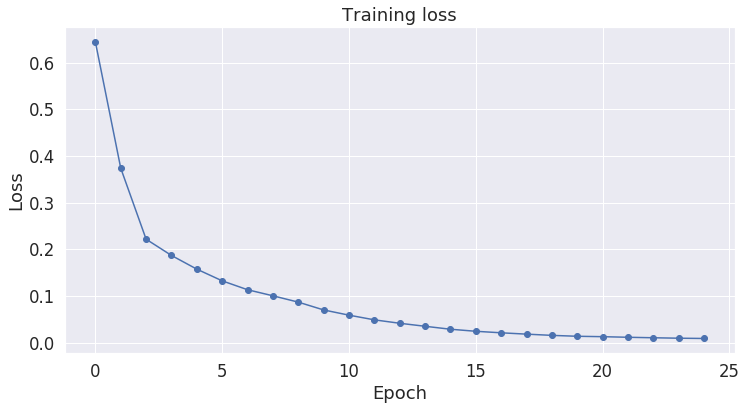

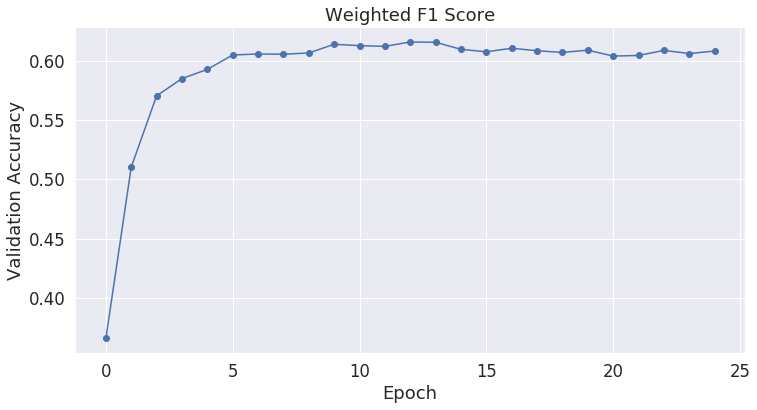

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,micro,macro,weighted,samples
Recall,0.611761,0.497515,0.611761,0.664692
Precision,0.610565,0.586307,0.608090,0.644279
F_Score,0.611163,0.529459,0.601859,0.611210


In [0]:
import random
import numpy as np

'''
hidden_layer_size = random.choice([128,256,512,1024])
batch_size = random.choice([128,256,512])
learning_rate = np.random.uniform(0.01, 0.0001)
dropout = np.random.uniform(0.5, 0.8)
sigmoid_thresh = np.random.uniform(0.3, 0.6)
weight_decay = np.random.uniform(0.1, 0.01)
num_maxout_units = np.random.randint(2,10)
max_norm = np.random.randint(5,20)
'''
epochs = 25
hidden_layer_size = 1024
batch_size = 512
learning_rate = 0.001
dropout = 0.7
sigmoid_thresh = 0.22
weight_decay = 0.01
num_maxout_units = 10
max_norm = 10
weight_decay2 = 0.1

hyperparameters = {'hidden_layer_size' : hidden_layer_size, 'epochs' : epochs, 'batch_size' : batch_size, 'learning_rate' : learning_rate, 'dropout' : dropout, 'scheduler_step_size' : 99999, 
                    'scheduler_lr_fraction' : 0.85, 'sigmoid_thresh' : sigmoid_thresh, 'num_maxout_units' : num_maxout_units, 'weight_decay' : weight_decay, 'max_norm' : max_norm}
for key, value in hyperparameters.items():
  print(key," : ",value)


train_test = Training_Testing_MM( Data_train_tensor_text, Data_train_tensor_image, Labels_train_tensor, 
                                  Data_test_tensor_text, Data_test_tensor_image, Labels_test_tensor, 
                                  Data_val_tensor_text, Data_val_tensor_image, Labels_val_tensor, Label_names=Label_names, 
                                  hidden_layer_size = hidden_layer_size, epochs = epochs, batch_size= batch_size, learning_rate = learning_rate, dropout = dropout, scheduler_step_size = 99999, 
                                  scheduler_lr_fraction = 0.85, sigmoid_thresh = sigmoid_thresh, num_maxout_units = num_maxout_units, weight_decay = weight_decay, max_norm = max_norm, weight_decay2 = weight_decay2)
train_test.Train()
train_test.Test()

